# HW02: $K$-means clustering

# A.Background: Clustering and Clustering objective

### CAVEAT: You should not modify any code in this section. Just run every code block in this section so that you can use the 
### variable *'X'* that contains our toy dataset.
### However, please understand the codes of this section so that you can find it useful and utilize this in the future.

---



### Clustering
- Suppose we have $N$ (the number of total vectors/data) $n$ (the dimension of each vector/data), $\mathbf{x}_1, ..., \mathbf{x}_N$.
- Goal of clustering is to group the vectors into $k$ clusters. (Normally, $k \ll N$)

*Suppose we have the following data, with $N=300$, $2$ dim vectors*

In [19]:
# 0. create and visualize our toy dataset.
# import necessary modules for this homework 
import numpy as np
import matplotlib.pyplot as plt

# define toy data points as variable 'X' (vectors)
X = np.concatenate(
    [[.3 * np.random.randn(2) for i in range(100)], # N1=100 2-dim vectors, sampled from Normal distribution centered @ (0, 0), scaled by 0.3 
     [np.array([1,1]) + .3 * np.random.randn(2) for i in range(100)], # N2=100 2-dim vectors, Normal distribution centered @ (1, 1), scaled by 0.3
     [np.array([1,-1]) + .3 * np.random.randn(2) for i in range(100)]] # N3=100 2-dim vectors, Normal distribution centered @ (1, -1), scaled by 0.3
, axis=0) # We concatenate(merge) N1,N2, N3 vectors (each has shape (100, 2)) into (300, 2); since
X.shape # (300, 2) = (N, n) 

(300, 2)

((-1.5, 2.5), (-2.0, 2.0))

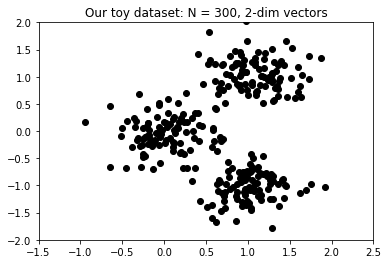

In [20]:
plt.scatter([x[0] for x in X],[x[1] for x in X], color='k') # scatter each dimension of data vector for each X, Y axis
plt.title("Our toy dataset: N = 300, 2-dim vectors")
plt.xlim([-1.5,2.5]),plt.ylim([-2,2]) # for the concise visualization

*Above is our toy dataset to cluster in the Problem 1 to 3.*

*By our intuition, we can expect there are $k = 3$ clusters.
Thus, in our imagination, the clusters may look like...*

((-1.5, 2.5), (-2.0, 2.0))

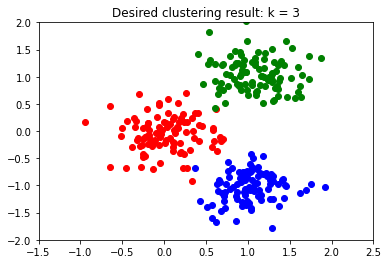

In [21]:
plt.scatter([x[0] for x in X[:100]],[x[1] for x in X[:100]], color='r') # first cluster as red
plt.scatter([x[0] for x in X[100:200]],[x[1] for x in X[100:200]], color='g') # second cluster as green
plt.scatter([x[0] for x in X[200:300]],[x[1] for x in X[200:300]], color='b') # third cluster as blue
plt.title("Desired clustering result: k = 3")
plt.xlim([-1.5,2.5]),plt.ylim([-2,2]) # for the concise visualization

*Since you've successfully understood (hopefully) all the contents we studied in Chapter 4 of our course,
now it's your turn to implement the $K$-means clustering algorithm **by your hand!** *

*In this homework, you will be asked to* (The notation follows that in the textbook and the course note) 
- First test your $K$-means algorithm with *Euclidean distance (Frobenius norm)* on the toy dataset **X** defined in the code block above

- Visualize the clustered result with two different values of $k = 2, 3$
- Then, change the distance metric in clustering objective from *Frobenius norm* $\lVert \mathbf{x_i} - \mathbf{z_{c_i}} \rVert_2$ to
**angle between two vectors**, i.e., $\arccos(\frac{\mathbf{x_i}^\top \mathbf{z_{c_i}}}{\lVert\mathbf{x_i}\rVert_2 \lVert\mathbf{z_{c_i}}\rVert_2} )$
- Finally, test your algorithm on the well-renowned MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database).

*From the lecture, we studied the pseudo-code for the actual implementation of $K$ means as follows.*

### *pseudo-code* for $K$-Means clustering
___

given a list of $N$ vectors $\mathbf{x_1}, ..., \mathbf{x}_N$, and an initial list of $k$ groups representative
vectors $\mathbf{z}_1, ..., \mathbf{z}_k$

The group representatives can be created by first randomly grouping vectors and 
then creating mean vectors to be used as representatives.

If the vectors (data points) and the group representatives are defined,


repeat until covergence

1. Partition the vectors into k groups. For each vector $i = 1, ..., N,$ assign $\mathbf{x}_i$ to the 
    group associated with the nearest representative.
2. Update representatives. For each group $j = 1, ..., k,$ set $\mathbf{z}_j$ to be the mean of the
    vectors in group $j$.
___

# B.Main functions: Main functions for implementing *K*-means algorithm


### CAVEAT: *Skeleton code incudes a usage of Python's list comprehension (LC).*
- You should get familar with this concept to understand the skeletal code and utilize afterwards.
Please refer to the following link if you're not familiar with the LC.

- https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

___
*Below is the main codes for implementing our K-means algorithm.*

In [4]:
# define the global learning variables for interation.
MAX_ITERS = 100
TOLERANCE = 1e-4

# don't modify this function
def plt_dynamic(x, y, ax, colors=['b']):
    # Plot the clustered data.
    for color in colors:
        ax.plot(x, y, color)

# define distance metrics
def norm(v):
    """
    Compute the Frobenious norm (Euclidean norm) of given vector
    :param v: the vector to compute its norm.
    :return: the norm of vector v.
    """
    return (np.sum(v * v))**0.5 #""" Problem #1; Fill in here."""

def angle(x, z):
    """
    Get the angle between two vectors x and z.
    :param x: the vector of single data point.
    :param z: the vector of representative of each cluster k.
    :return: the angle (< pi) between two vectors x and z.
    """
    return np.sum(x * z)/norm(x)/norm(z) #""" Problem #3; Fill in here. """

# define our main K-means cluster function
def kmeans(X, k, metric='frobenius'):
    """
    Cluster the given data 'X' into 'k' clusters, using the 'metric'
    :param X: X in Numpy array of shape [Num of data, Vector dim], 
    :param k: the vector of representative of each cluster k.
    :param metric: the type of clustering metric. 'frobenius' / 'angle'.
    :return: list that contains each data's cluster assignment of length N and k class representative vectors 
    """
    N = X.shape[0] # amount of vectors
    print("Total number of datapoints is:", N)
    n = X.shape[1] # dimension of each vector
    print("dimension of each data is:", n)
    # define dummy variables to store clustering info.
    distances = np.zeros(N) # stores distances of each point to the nearest representative
    jPrev = np.Inf # prvious cost function for ending criterion
    reps = [np.zeros(n) for j in range(k)] # create the representative variables

    costs = [] # for the visualization of cost function
    iters = [] # for the visualization of cost function

    # for each datapoint of N, randomly assign the group index as an integer 0, ..., k-1
    # Hint: refer to Python's list comprehension feature (LC) and use method under numpy.random module.
    assignment = [ np.random.randint(0,k)  for i in range(N)] 
    
    # actual K-means algorithm
    itr_last = 0 # the last iteration index
    for itr in range(MAX_ITERS):
        
        for j in range(k):#""" Problem #1; Fill in here. """: # iterate over k representatives 

            # collect the indicies in variable 'assignment' that corresponds to each group j = 0, 1, ..., k - 1. 
            # Hint: you may choose one of the two expression below.

            # You may take this expression 1, - list comprehension   
            group = [i for i in range(N) if assignment[i]==j] 
            
            # Or this expression 2 - vanilla for loop. 
            #group = []
            #for i in range(N):
            #    if """ Problem #1; Fill in here. """:
            #        """ Problem #1; Fill in here. """
            
            # update the representative vector data for each group j 'reps[j]' as the mean vector of each group's data points.
            # Hint: you can use the numpy indexing, using the indices as Python list.
            reps[j] = np.mean(X[group], axis = 0) # update representative as the mean of datapoint for each class
        
        for i in range(N): # iterate over the number of whole data points
           
            # (distance and index)
            # compute distance between each data point x[i] and representatives reps[j], and save to the list.
            # Hint: complete the 'norm()' method (for Problem1) and 'angle()' (for Problem2) and utilize. 
            if metric == 'frobenius':
                measure = [norm(X[i]-reps[j]) for j in range(k)]
            elif metric == 'angle':
                measure = [angle(X[i], reps[j]) for j in range(k)]
            else:
                raise ValueError("This metric is not supported.")
            
            # Hint: you can use numpy module's method that returns minimum value and index of given list.
            distances[i] = np.min(measure)  # get the smallest distance among k measurements
            assignment[i] = np.argmin(measure) # get the cluster assignment of corresponding smallest measurement
        
        # compute the clustering objective
        # Hint: you can refer to Eq.(4.1) of the text book, and use the norm() method you implemented.
        J =  (1/N)*sum([norm(X[i]-reps[assignment[i]])**2 for i in range(N)])

        # Exception handling
        if np.isnan(J) or np.isinf(J):
            raise ValueError("Loss is Nan or Inf! Stopping the iteration...")

        # Append cost and the index of iteration for visualization
        costs.append(J)
        iters.append(itr)

        # let's make log
        if itr < 10:
            print("Iter: " + str(itr) + " Cost: " + str(J))
        elif itr >= 10 and itr % 10 == 0:
            print("Iter: " + str(itr) + " Cost: " + str(J))

        # if error criterion satisfied, let's get out of the loop.
        if (itr > 1) and (abs(J-jPrev)) < (TOLERANCE * J):
            itr_last = itr
            break

        # end the loop if we couldn't satisfy the criterion before the max iterations.
        if itr == MAX_ITERS - 1:
            itr_last = itr
            print("Reached max iteration, but could not satisfy the tolerance.")
        
        # update the jPrev to compute the error for the next iteration
        jPrev = J

    # draw the plot for Cost per iteration. You should get familiar with the Matplotlib.
    fig, ax = plt.subplots(1,1)
    ax.set_title('K-Means cost over iterations')
    ax.set_xlabel('Iterations') ; ax.set_ylabel('Cost')
    ax.set_xlim(0, itr_last) ; ax.set_ylim(0, np.max(costs))
    plt_dynamic(iters, costs, ax, 'ro')
    
    # return the list of assignments and representatives
    return  assignment, reps

# C.Run and visualzie algorithm

### CAVEAT: You shoud group the dataset variable *X* according to the cluster assignment returned my our *kmeans()* function. 
- Once you successfully implement the call of *kmeans()* function and grouping out the data into the list *groups* below, everything is just 
repeatition of it.
---
*Let's call our function kmeans() by giving proper arguments of data, cluster, and the metric.*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 0.9534398745448289
Iter: 1 Cost: 0.5094969488131723
Iter: 2 Cost: 0.45012732528216126
Iter: 3 Cost: 0.44970306885084316
Iter: 4 Cost: 0.44964704434001146
Iter: 5 Cost: 0.44964704434001146


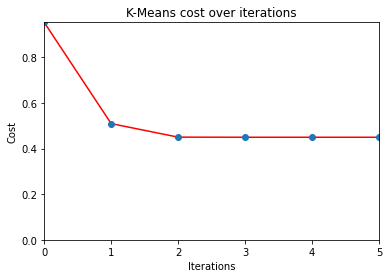

In [5]:
k = 2
# test with frobenius metric
# call the kmeans() function by parsing our toy data 'X', the # of clusters 'k',
# and flag we're using Frobenious norm as metric.
assignment, reps = kmeans(X,k, metric = 'frobenius')

*We see the decrease of the cost function.*

*Then, let's visualize our result for $k=2$*

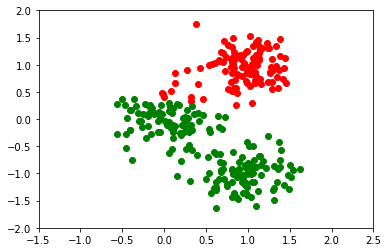

In [6]:

# create a list that consists of lists that contains data points 'X' for each clustering group j = 0, 1, ... k.
# Hint: You can either implement in list comprehension or normal for loop
# Option 1: Fill out the list comprehension form
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]



# plot the result.
plt.scatter([c[0] for c in groups[0]], [c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]], [c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*We can see that our data points somehow clustered into two groups!*

*Now, what if we assume there are three representatives? i.e. $k=3$*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 0.9218680086654404
Iter: 1 Cost: 0.16473723519184508
Iter: 2 Cost: 0.15632712412967636
Iter: 3 Cost: 0.15620008124849927
Iter: 4 Cost: 0.15620008124849927


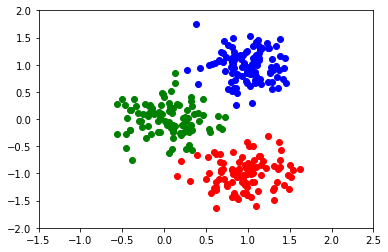

In [7]:
k = 3
# test with frobenius metric
# call the kmeans() function by parsing our toy data 'X', the # of clusters 'k',
# and flag we're using Frobenious norm as metric.
assignment, reps= kmeans(X, k, metric = 'frobenius')

groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]



# plot the result
plt.clf()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]], color='b') # plot the data poiints in blue color for k=2
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*Wow!, our algorithm clusters our data into three group, similar to our initial guess from our intuition!*

# D.Test for the new clustering metric

### CAVEAT: You should implement the angle() function and complete some portion of kmeans() function in the *section B*. 
- You are asked to implement the function that computes angle between two vectors. Please refer to pseudo-code in *section C*.

___
*Now, let's change the metric to the angle between datapoint and the representative vectors.*

*You can again use our kmeans() function, and first fill out the angle() function then use it inside the kmeans().*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 1.1005079065545
Iter: 1 Cost: 2.692105448027951
Iter: 2 Cost: 2.692105448027951


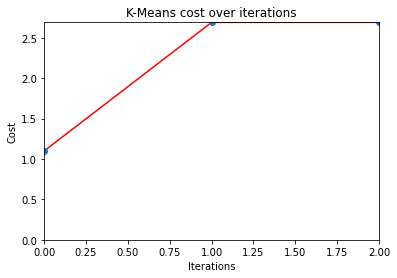

In [8]:
# cluster with k = 2, based on angle metric
k = 2
# 1) test with angle metric
assignment, reps = kmeans(X, k, metric = 'angle')

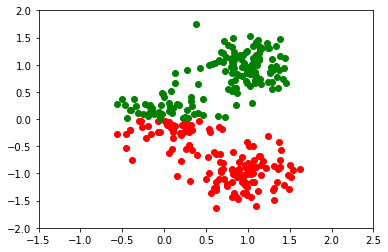

In [9]:
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]


plt.clf()
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
plt.show()

*Hmm, looks weird... what about the $k=3$ setting?*

Total number of datapoints is: 300
dimension of each data is: 2
Iter: 0 Cost: 1.1525103597726987
Iter: 1 Cost: 2.5841730119292787
Iter: 2 Cost: 2.4447295465791568
Iter: 3 Cost: 2.372045959013581
Iter: 4 Cost: 2.4273968300543003
Iter: 5 Cost: 2.372571933933008
Iter: 6 Cost: 2.4108040161608897
Iter: 7 Cost: 2.3656248071077135
Iter: 8 Cost: 2.4358228941742133
Iter: 9 Cost: 2.3829528492798233
Iter: 10 Cost: 2.4974039504010723
Iter: 20 Cost: 2.4990415391052525
Iter: 30 Cost: 2.4990415391052525
Iter: 40 Cost: 2.4990415391052525
Iter: 50 Cost: 2.4990415391052525
Iter: 60 Cost: 2.4990415391052525
Iter: 70 Cost: 2.4990415391052525
Iter: 80 Cost: 2.4990415391052525
Iter: 90 Cost: 2.4990415391052525
Reached max iteration, but could not satisfy the tolerance.


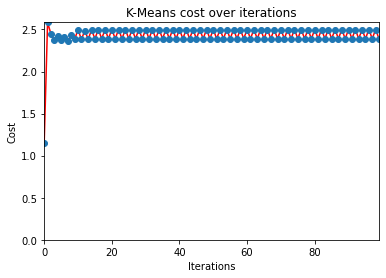

In [11]:
# cluster with k = 3, based on angle metric
k=3
# 1) test with angle metric
assignment, reps = kmeans(X, k, "angle")

((-1.5, 2.5), (-2.0, 2.0))

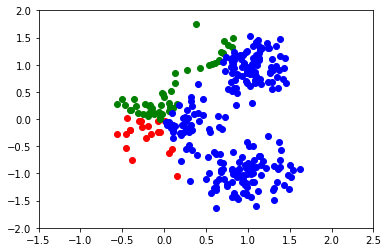

In [12]:
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]



plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]], color='r') # plot the data points in red color for k=0
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]], color='g') # plot the data poiints in green color for k=1
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]], color='b') # plot the data poiints in blue color for k=2
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

*It turns out that angle metric does not perform well compared to the frobenious metric.*

# E.More challenging dataset, MNIST
### CAVEAT: If you have implemented the kmeans(), norm(), and angle() functions as our intent, a little modification of MNIST dataset should be 
### enough to test your algorithm on it.

- You might have heard about MNIST if you have an interest for the machine learning
- What's MNIST? : https://en.wikipedia.org/wiki/MNIST_database
- You (hopefully) can download the dataset directly from the Colab or Jupyternote book session by running the code block
If it doesn't work, please let us know via eTL's Q&A board.
___


*Now, let's prepare our MNIST dataset directly online.*

In [13]:
# NOTE: In case the Tensorflow is not installed in your system, please uncomment the line below.
# NOTE: those who're working in the Colab may be already equipped with Tensorflow.
# ! pip install tensorflow==2.0.0
import tensorflow as tf
# Import tensorflow's MNIST data handle
mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz') # mnist contains the numpy array of mnist dataset
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

*The variable 'mnist' is a dataset of 60,000 28X28 grayscale images of 10 digits, along with a test set of 10,000 images.*

*Its  data type is nested image & label tuples of train & test tuples of Numpy arrays:*

        tuple(
                tuple(x_train, y_train), 
                tuple(x_test, y_test),
        )



*In this assignment, we'll just use the **x_test** which consists of 10,000 grayscale images.
Also, as the experiments of section 4.4.1 of the textbook say,
we will cluster the data into $k=20$ clusters, i.e. set $k=20$ representatives.
*

*To do so, let's define the variable for our MNIST dataset and reshape it to fit our algorithm.*


In [14]:
(_, _), (X, _) = mnist # In convention, we set the variable as '_' in case we won't use it.

# Get the shape of our numpy array of MNIST 'X'.
B, H, W = X.shape[0], X.shape[1], X.shape[2] # (B=60000, H=28, W=28), NOTE: X is an numpy array

# Reshape the (28 * 28) gray scale MNIST image into 28^2 array. 
X = X.reshape(B, H*W) # represent each image is 784-dim vector. (10000, 784) 

*If you have successfully reshaped the MNIST data variable **X** into shape of (Num of data, Vector dim), let's
feed this to our algorithm like before.*

### CAVEAT: Since we're dealing with tremendous number of samples, the optimization loop will take some time.

*First, cluster with the Frobenius norm metric.*

Total number of datapoints is: 10000
dimension of each data is: 784
Iter: 0 Cost: 3334332.7551209396
Iter: 1 Cost: 2567812.3186724014
Iter: 2 Cost: 2421722.775060691
Iter: 3 Cost: 2362670.725828242
Iter: 4 Cost: 2331568.5537439026
Iter: 5 Cost: 2313598.680794196
Iter: 6 Cost: 2304763.6733086803
Iter: 7 Cost: 2299660.9833562686
Iter: 8 Cost: 2295636.7821024
Iter: 9 Cost: 2292035.7397993216
Iter: 10 Cost: 2289146.8595451876
Iter: 20 Cost: 2276391.646579902
Iter: 30 Cost: 2271191.7027106914


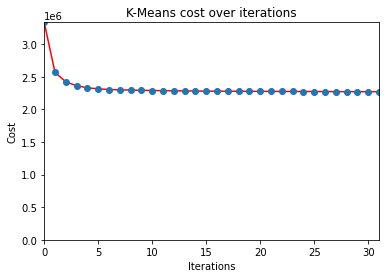

In [15]:
k = 20

# cluster our MNIST data into 20 clusters, using Frobenius norm metric
assignment, reps = kmeans(X, k, 'frobenius')

*Now, let's visualize the $k=20$ representative samples!*

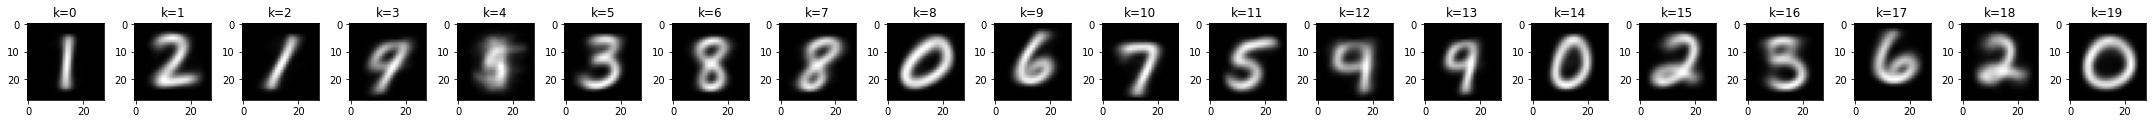

In [16]:
# NOTE: code for visualizing the clustred MNIST data
num_samples = k
num_col = k
num_row = 1

# plot images
# Hint: the reps[i] is having the shape of 784 dim vector.
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col,2 * num_row))
for i in range(num_samples):
    ax = axes[i]
    ax.imshow(reps[i].reshape(H, W), cmap='gray')
    ax.set_title('k={}'.format(i % 20))
plt.tight_layout()
plt.show()


*Wow!, the representative samples, which are the mean vector of each cluster, look like actual data!*

*Then, let's check some samples for each representative $k$, if they look similar to each representative.*

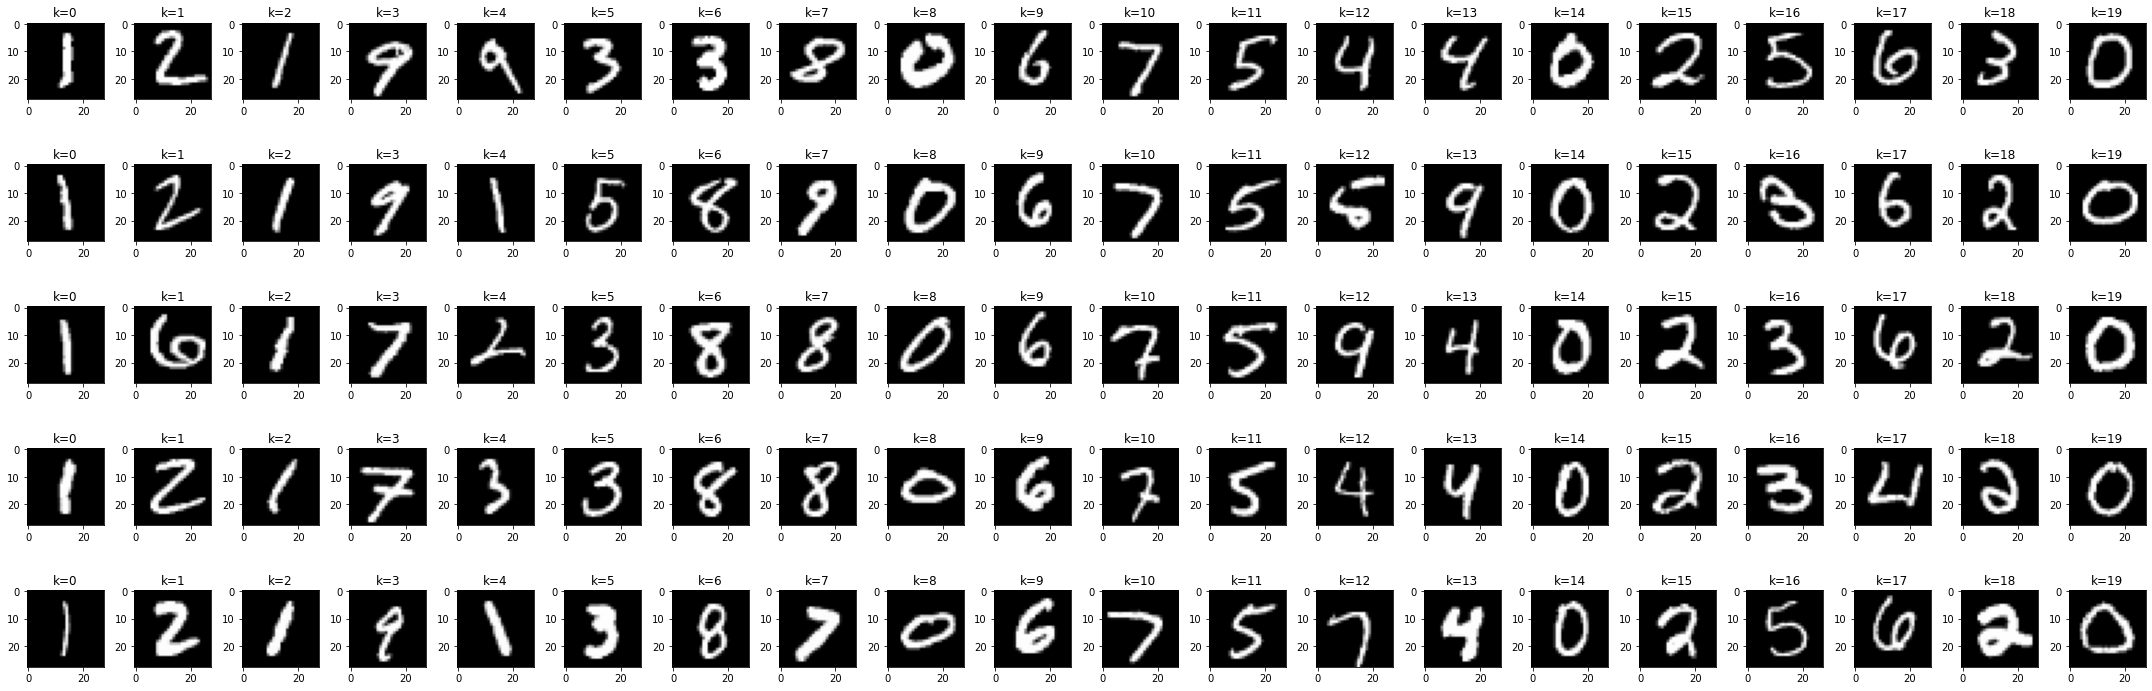

In [17]:
# NOTE: code for visualizing the clustred MNIST data.

samples_each = 5
num_col = k
num_row = samples_each
num_samples = k * samples_each

data_samples = []
for k in range(num_row * len(reps)):
    ind = k // 20
    inds = np.where(np.array(assignment) == k % 20)
    data_samples.append(X[inds[0][ind]])

# Hint: the data_samples[i] is having the shape of 784 dim vector.
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_samples):
    ax = axes[i//num_col, i%num_col]
    if i % 20 == 0:
        data_samples
    ax.imshow(data_samples[i].reshape(H, W), cmap='gray')
    ax.set_title('k={}'.format(i % 20))
plt.tight_layout()
plt.show()

*Each row shows the samples for each cluster that is represented by the data point we have visualized previously. 
We can see that the samples look similar to corresponding repsentative sample!
*

### results from the angle metric
### CAVEAT: This will NOT converge, just report the error log occured by the diverging cost.

*How about the clustered sampels optimized from angle metric?*

In [18]:
k = 20
# cluster our MNIST data into 20 clusters, using angle norm metric
assignment, reps = kmeans(X, k, 'angle')
# assignment: len N list of cluster indices; reps: len n list of representive vectors
num_samples = 20
num_col = 20
num_row = 1

# plot images
# Hint: the reps[i] is having the shape of 784 dim vector.
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_samples):
    # ax = axes[i//num_col, i%num_col]
    ax = axes[i]
    ax.imshow(reps[i].reshape(H, W), cmap='gray')
    ax.set_title('k={}'.format(i))
plt.tight_layout()
plt.show()


Total number of datapoints is: 10000
dimension of each data is: 784
Iter: 0 Cost: 3538294.532924009
Iter: 1 Cost: 5236043.992447633


C:\Users\eagle\anaconda3\envs\sypark\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\eagle\anaconda3\envs\sypark\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: Loss is Nan or Inf! Stopping the iteration...

*Ouch,... we get the error, since the cost functon has diverged to infinity...
Thus, it seems like angle is not a proper metric for naive implementation of K-means clustering.
*